In [2]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [12]:
#pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.4 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 56.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as numpy
import os
import matplotlib.pyplot as plt

from ultralytics import YOLO
from fastai.vision.all import *
from fastcore.parallel import *
from PIL import Image

In [4]:
trn_path = 'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset\\train'
val_path = 'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset\\val'
files = get_image_files(trn_path)

In [5]:
files

(#7328) [Path('D:/Gine/Desktop/School/AO AI4/Cloud for AI/Assignment/Project/Cloud-For-AI-Assignment/data/sports-balls_dataset/train/american_football/american_football_0.jpg'),Path('D:/Gine/Desktop/School/AO AI4/Cloud for AI/Assignment/Project/Cloud-For-AI-Assignment/data/sports-balls_dataset/train/american_football/american_football_1.jpg'),Path('D:/Gine/Desktop/School/AO AI4/Cloud for AI/Assignment/Project/Cloud-For-AI-Assignment/data/sports-balls_dataset/train/american_football/american_football_10.jpg'),Path('D:/Gine/Desktop/School/AO AI4/Cloud for AI/Assignment/Project/Cloud-For-AI-Assignment/data/sports-balls_dataset/train/american_football/american_football_101.jpg'),Path('D:/Gine/Desktop/School/AO AI4/Cloud for AI/Assignment/Project/Cloud-For-AI-Assignment/data/sports-balls_dataset/train/american_football/american_football_102.jpg'),Path('D:/Gine/Desktop/School/AO AI4/Cloud for AI/Assignment/Project/Cloud-For-AI-Assignment/data/sports-balls_dataset/train/american_football/amer

(225, 225)


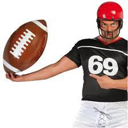

In [6]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [5]:
def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=0)
pd.Series(sizes).value_counts()

(225, 225)      1281
(275, 183)       199
(800, 800)       157
(300, 300)       151
(1280, 720)      121
                ... 
(300, 270)         1
(1600, 1127)       1
(612, 522)         1
(600, 476)         1
(600, 594)         1
Length: 2063, dtype: int64

YOLO V8 Model Training

In [3]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.28M/5.28M [00:00<00:00, 26.5MB/s]


In [53]:
model.train(data='D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset', epochs=15, imgsz=183)

Ultralytics YOLOv8.0.231 🚀 Python-3.10.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-8750H 2.20GHz)
engine\trainer: task=classify, mode=train, model=D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\notebooks\runs\classify\train\weights\last.pt, data=D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset, epochs=15, time=None, patience=50, batch=16, imgsz=183, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augm

train: Scanning D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset\train... 7328 images, 0 corrupt: 100%|██████████| 7328/7328 [00:00<?, ?it/s]
val: Scanning D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset\val... 1841 images, 0 corrupt: 100%|██████████| 1841/1841 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
15 epochs...

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:26<00:00,  2.23it/s]

                   all      0.867      0.974



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:26<00:00,  2.20it/s]

                   all      0.867      0.974



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:25<00:00,  2.29it/s]

                   all      0.851      0.965

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:24<00:00,  2.35it/s]

                   all      0.869      0.973



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:32<00:00,  1.79it/s]

                   all      0.863       0.97



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:27<00:00,  2.13it/s]

                   all      0.876      0.973



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:27<00:00,  2.08it/s]

                   all      0.864      0.971



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:27<00:00,  2.11it/s]

                   all      0.878      0.972



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:24<00:00,  2.36it/s]

                   all      0.873      0.973

      Epoch    GPU_mem       loss  Instances       Size



      10/15         0G    0.01595         16        192: 100%|██████████| 458/458 [03:01<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:24<00:00,  2.38it/s]

                   all      0.883       0.97



      Epoch    GPU_mem       loss  Instances       Size


      11/15         0G    0.01153         16        192: 100%|██████████| 458/458 [03:01<00:00,  2.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:24<00:00,  2.33it/s]

                   all      0.878      0.972

      Epoch    GPU_mem       loss  Instances       Size



      12/15         0G   0.007289         16        192: 100%|██████████| 458/458 [03:46<00:00,  2.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:33<00:00,  1.71it/s]

                   all      0.885      0.975



      Epoch    GPU_mem       loss  Instances       Size


      13/15         0G   0.004402         16        192: 100%|██████████| 458/458 [03:55<00:00,  1.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:28<00:00,  2.02it/s]

                   all       0.88      0.974

      Epoch    GPU_mem       loss  Instances       Size



      14/15         0G   0.004626         16        192: 100%|██████████| 458/458 [03:45<00:00,  2.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:30<00:00,  1.90it/s]

                   all      0.885      0.973

      Epoch    GPU_mem       loss  Instances       Size



      15/15         0G   0.002996         16        192: 100%|██████████| 458/458 [03:35<00:00,  2.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:26<00:00,  2.18it/s]

                   all      0.886      0.974



15 epochs completed in 0.959 hours.
Optimizer stripped from runs\classify\train2\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train2\weights\best.pt, 3.0MB

Validating runs\classify\train2\weights\best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-8750H 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1454095 parameters, 0 gradients, 3.3 GFLOPs
train: D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset\train... found 7328 images in 15 classes ✅ 
val: D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\sports-balls_dataset\val... found 1841 images in 15 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 58/58 [00:27<00:00,  2.08it/s]


                   all      0.886      0.974
Speed: 0.0ms preprocess, 5.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train2
Results saved to runs\classify\train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020C8D53A260>
curves: []
curves_results: []
fitness: 0.9304725527763367
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8864747285842896, 'metrics/accuracy_top5': 0.9744703769683838, 'fitness': 0.9304725527763367}
save_dir: Path('runs/classify/train2')
speed: {'preprocess': 0.0005399060598991929, 'inference': 5.50590113153411, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.8864747285842896
top5: 0.9744703769683838

Trained model after 15 epochs

In [2]:
models = YOLO('D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\\notebooks\\runs\classify\\train\weights\last.pt')

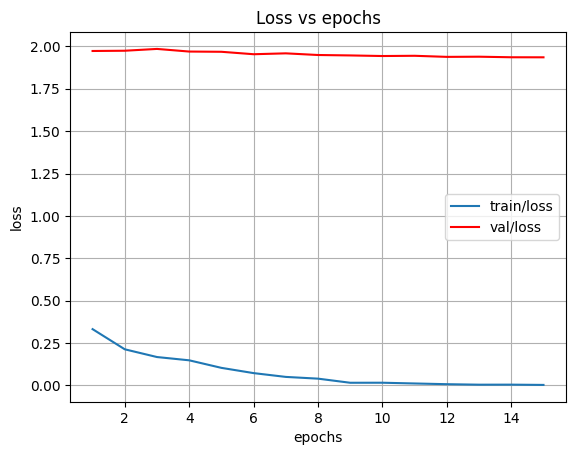

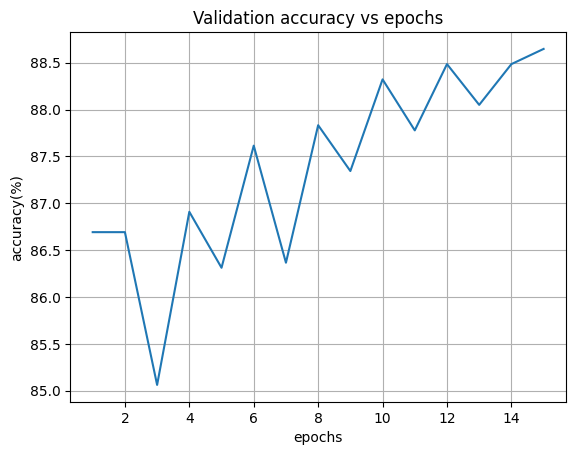

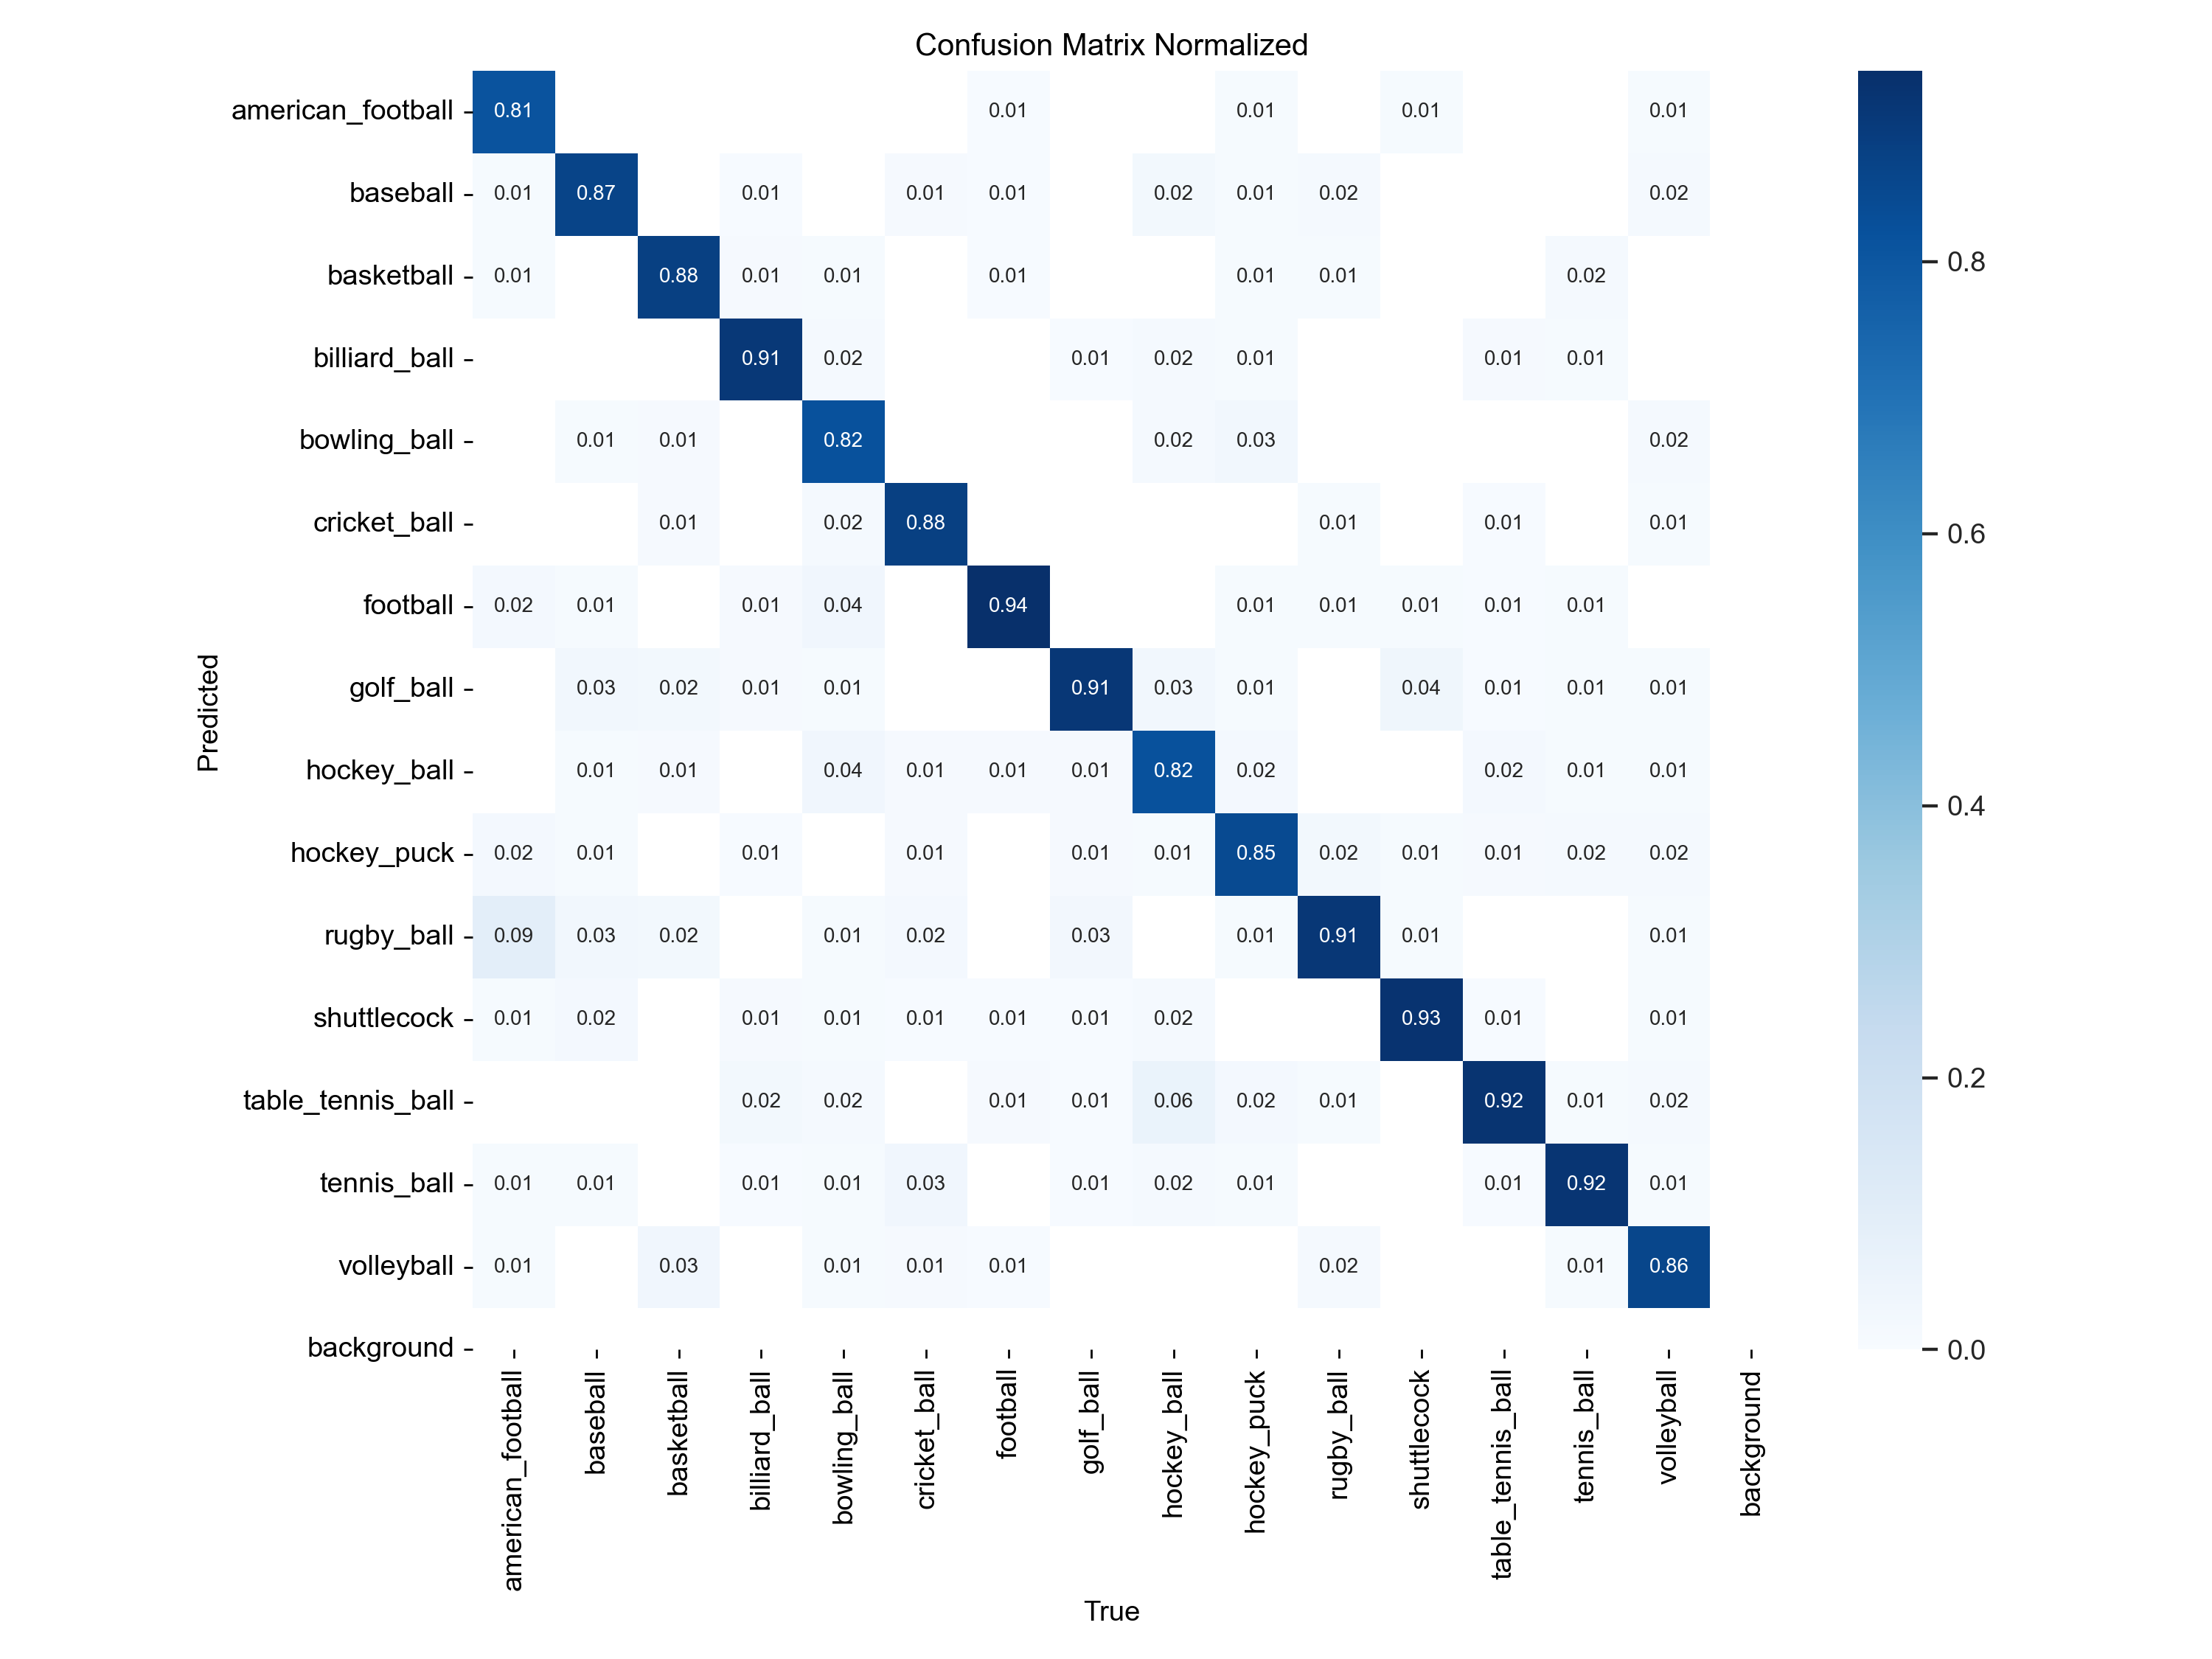

In [10]:
# Plot metrics

%matplotlib inline

result_path = 'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\\notebooks\\runs\classify\\train\\results.csv'
results = pd.read_csv(result_path)

plt.figure()
plt.plot(results['                  epoch'],results['             train/loss'],label='train/loss')
plt.plot(results['                  epoch'],results['               val/loss'],label='val/loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.figure()
plt.plot(results['                  epoch'],results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy(%)')
plt.xlabel('epochs')

plt.show()

display(Image.open('D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\\notebooks\\runs\classify\\train\confusion_matrix_normalized.png'))

Predictions with model

In [81]:
# predict

# results = model('D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\\notebooks\\1588317191.jpg')

results = model(['D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\hockey_puck.jpg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\\volley_ball.jpeg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\golf_ball.jpeg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\golf_ball(1).jpeg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\\baseball.jpeg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\hockey_puck(1).jpeg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\golf_ball(2).jpeg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\shuttlecock.jpg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\shuttlecock(1).jpg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\\football.jpg',
                'D:\Gine\Desktop\School\AO AI4\Cloud for AI\Assignment\Project\Cloud-For-AI-Assignment\data\predict\\football(1).jpeg'])

names_dict = results[0].names

for result in results:
    probs = result.probs
    print("Prediction: {} - Confidence: {:0.2f}%".format(names_dict[probs.top1],probs.numpy().top1conf*100))


0: 192x192 hockey_puck 1.00, golf_ball 0.00, bowling_ball 0.00, basketball 0.00, hockey_ball 0.00, 1: 192x192 volleyball 1.00, basketball 0.00, football 0.00, baseball 0.00, tennis_ball 0.00, 2: 192x192 tennis_ball 1.00, golf_ball 0.00, cricket_ball 0.00, baseball 0.00, hockey_ball 0.00, 3: 192x192 hockey_ball 1.00, table_tennis_ball 0.00, golf_ball 0.00, tennis_ball 0.00, bowling_ball 0.00, 4: 192x192 baseball 1.00, cricket_ball 0.00, shuttlecock 0.00, american_football 0.00, volleyball 0.00, 5: 192x192 hockey_puck 1.00, basketball 0.00, volleyball 0.00, table_tennis_ball 0.00, tennis_ball 0.00, 6: 192x192 golf_ball 1.00, hockey_ball 0.00, table_tennis_ball 0.00, rugby_ball 0.00, cricket_ball 0.00, 7: 192x192 shuttlecock 1.00, cricket_ball 0.00, bowling_ball 0.00, golf_ball 0.00, tennis_ball 0.00, 8: 192x192 shuttlecock 1.00, rugby_ball 0.00, tennis_ball 0.00, american_football 0.00, bowling_ball 0.00, 9: 192x192 football 1.00, golf_ball 0.00, hockey_puck 0.00, rugby_ball 0.00, baseb